#  IE7374: Final Lab

By: Shaikha AlAsousi, Joslyn Pereira, Alice Tinna  

In [1]:
# Importing all the Necesssary Libraries 

import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
import missingno as missno
from sklearn.svm import SVC
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import preprocessing
from sklearn import utils



# Ensuring all Plots have a Dark Background. 
plt.style.use('dark_background')

In [2]:
np.random.seed(123)

In [3]:
# Importing the 'housing.txt' File using 'pandas' as a DataFrame.

df = pd.read_csv('Housing.txt')

In [4]:
# Checking the Columns

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
# Checking the Information of our DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Let's see what our Descriptive Statistics looklike for each of our Variables.

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Question 1:

## Finding Missing Values

In [7]:
# Checking the Missing Values using 'isnull().'

df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


For a clearer understanding about the Missing Values let's use another form.

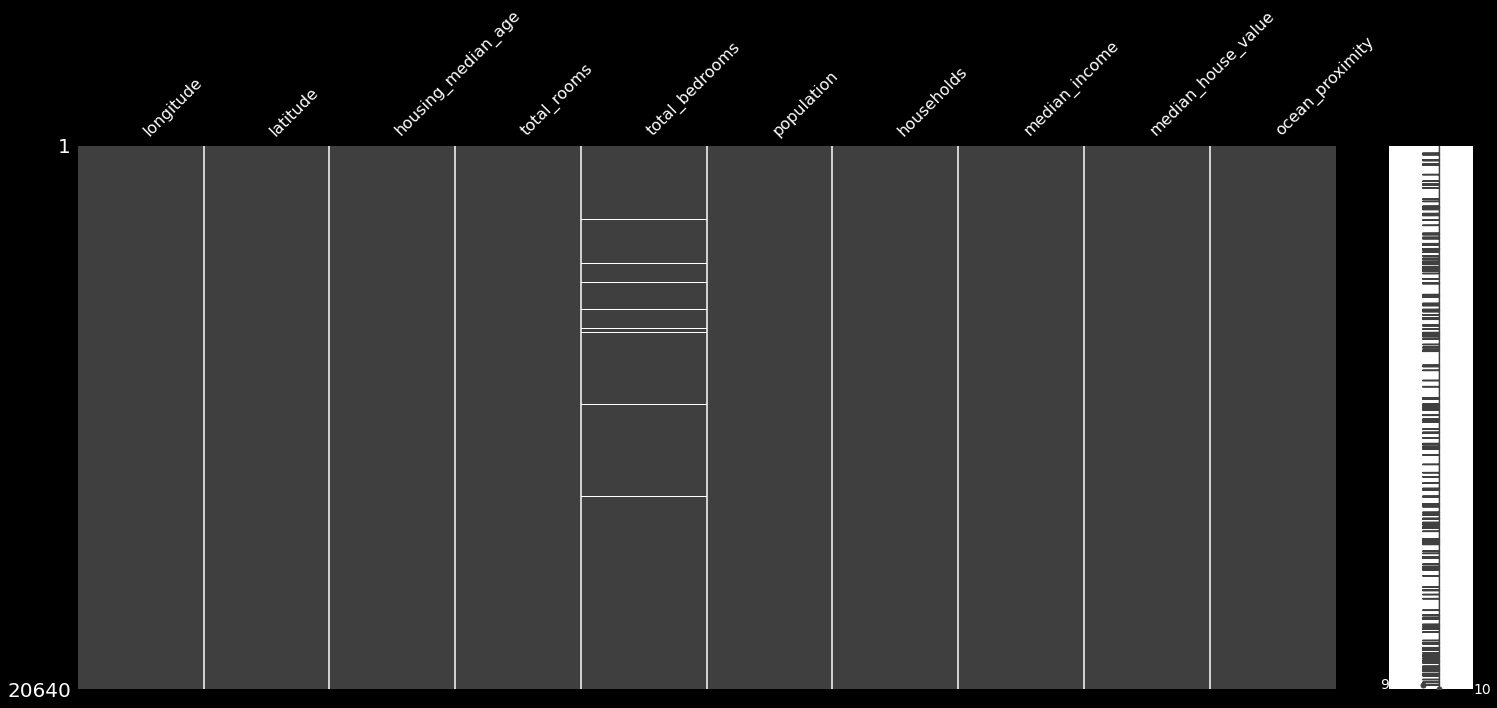

<Figure size 1080x648 with 0 Axes>

In [8]:
# Checking the Missing Values in our DataFrame through Matrix using 'missingno' Package

missno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

From the Matrix above we can see that the Column 'Total_Bedrooms' has the most Missing Values.

## Calculating the Missing Values and Replacing them with the Mean.

In [9]:
# Calculating How Many Missing Values we have in Total the Null Values

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We can see we have 207 Missing Values in Column 'Total_Bedrooms'. 
We can Replace the Missing Values with the Mean.

In [10]:
# We can Replace the Missing Values with the Mean, we can use fillna() Function to Fill the Missing Values.

df.total_bedrooms=df.total_bedrooms.fillna(df.total_bedrooms.mean())
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Binning the Column "Median_Income"

In [11]:
# For Binning the 'Median_Income' we will use the Pandas 'Method Cut'.

df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

With the Help of the Describe Function, we know that the 'Median_Income' Ranges from '0 to 16.' 

In [12]:
# So, Keeping in Mind the Min and Max we have binned, we Create a New Column "Median_income_Binned."

bins=[0,3,6,9,12,15]
labels=['Bin 1','Bin 2' , 'Bin 3' , 'Bin 4', 'Bin 5']

In [13]:
df['Median_income_Binned'] = pd.cut(df['median_income'], bins=bins , labels=labels)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Median_income_Binned
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Bin 3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Bin 3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Bin 3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Bin 2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Bin 2
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,Bin 1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,Bin 1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,Bin 1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,Bin 1


In [14]:
# Calculating the Count of the Bins on our DataFrame. 

df['Median_income_Binned'].value_counts()

Bin 2    10875
Bin 1     7403
Bin 3     1955
Bin 4      294
Bin 5       64
Name: Median_income_Binned, dtype: int64

We can see 'Bin 2' has the Maximum Number which means the the Frequency is Highest between '3-6' in 'Median_Income.'

<AxesSubplot:>

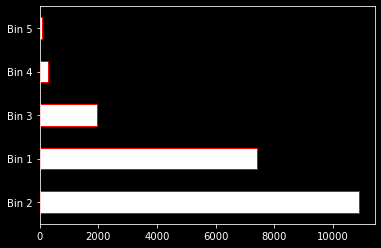

In [15]:
# Visualizing the Bin for our DataFrame on the Basis of 'Median_Income.'

df['Median_income_Binned'].value_counts().plot(kind='barh' ,color='white' , ec="red")

## Identifying the Categorical Variables

In [16]:
# Identifying the Categorical Column in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   longitude             20640 non-null  float64 
 1   latitude              20640 non-null  float64 
 2   housing_median_age    20640 non-null  float64 
 3   total_rooms           20640 non-null  float64 
 4   total_bedrooms        20640 non-null  float64 
 5   population            20640 non-null  float64 
 6   households            20640 non-null  float64 
 7   median_income         20640 non-null  float64 
 8   median_house_value    20640 non-null  float64 
 9   ocean_proximity       20640 non-null  object  
 10  Median_income_Binned  20591 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


From the information above, we know that our Categorical Variable is 'Ocean_Proximity.'

## Applying One-Hot Encoding

One-Hot Encoding is essentially the representation of Categorical Variables as Binary Vectors. So here, our Categorical Variable is 'Ocean_Proximity', we will apply 'One-Hot Encoding' to it. We will use 'sci-kit' learn package for doing the same thing.

In [17]:
lable_encoder = LabelEncoder()
df['ocean_proximity']=lable_encoder.fit_transform(df['ocean_proximity'])

To solve this problem, a popular option is to construct one binary attribute for each category: one for "1H OCEAN" (and 0 otherwise), another for "INLAND" (and 0 otherwise), and so on. One-Hot Encoding is named from the fact that just one characteristic will be set to 1 (Hot), while the others will be set to 0 (Cold).

In [18]:
# Now we can see the Dtype of 'Ocean_Proximiy' has been Converted to an Integer

df['ocean_proximity'].dtypes

dtype('int32')

## Plotting Histogram of all the Variables in our DataFrame

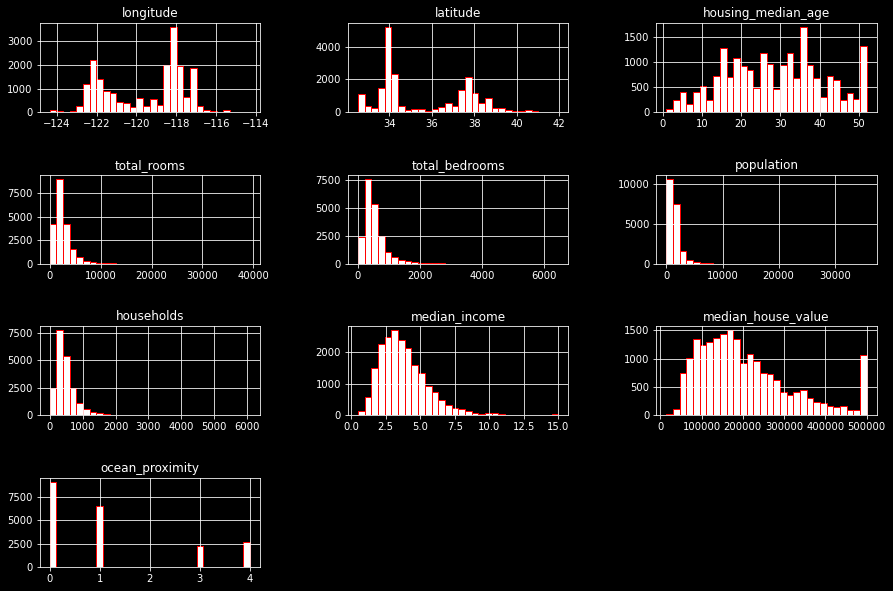

In [19]:
# Plotting the Histogram with 30 Bins of all our Variables.

df.hist(bins=30, figsize=(15, 10) , color='white' , ec="red")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The median income is a long-tail distribution. 
It indicates that people's salaries are more or less evenly divided, but that certain individuals earn a lot of money.
The distribution of the average house age is more or less consistent.

## Scatterplot for our DataFrame

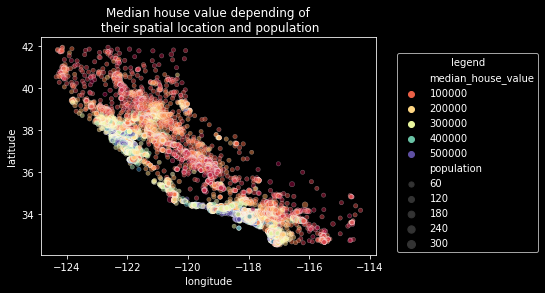

In [20]:
# Plotting the Pairplot with the our 'x-variable' being Longitude and 'y-variable' being Latitude. 

sns.scatterplot(data=df, x="longitude", y="latitude",
                size=df["population"]/100, hue="median_house_value",
                palette="Spectral", alpha=0.5)
plt.legend(title="legend", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location and population")

As you presumably already know, house costs are heavily influenced by location (e.g., proximity to the seaside) and population density. Using a clustering technique to find the main clusters and adding new characteristics that quantify the closeness to the cluster centers would most likely be beneficial. Although house prices in coastal regions in Northern California are not too expensive, the ocean proximity characteristic may be advantageous as well.

Now lets Standardise the Data for further analysis. Uisng sklearn 'standerscaler' we will standardise our housing data

In [21]:
# Creating Standard Scaler Object

del df["Median_income_Binned"]
ss = StandardScaler()
scaled_df = ss.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,1.291089


Because the dataset isn't too enormous, we can use the corr( ) function to quickly compute the standard correlation coefficient (also known as Pearson's r) between each pair of attributes:

## Correlation for all our Variables in the DataFrame 

In [22]:
# Showing the Correlation between Data

df_correlation = scaled_df.corr()
df_correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.014688
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,0.081750,1.000000


Only Linear Correlations are measured by the Correlation Coefficient ("if x goes up, then y typically goes up or down"). Nonlinear Connections may be entirely dismissed. Despite the fact that their axes are plainly not independent, all of the graphs in the bottom row have a Correlation Coefficient of zero: these are Instances of Nonlinear Connections. The second row also includes situations where the correlation coefficient is equal to 1 or –1; note that this has no bearing on the slope. 

<AxesSubplot:>

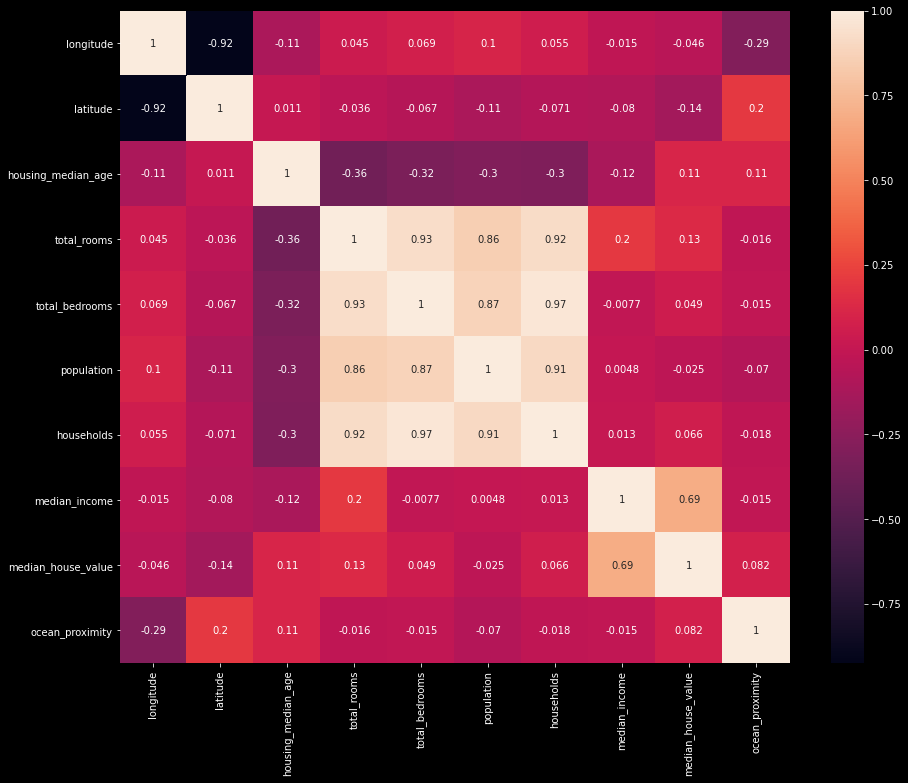

In [23]:
# Housing DataFrame Correlation via 'Heat Map.'

plt.figure(figsize=(15,12))
sns.heatmap(df_correlation, annot = True)

In [24]:
# Dividing the DataFrame into Features and Target Variables

X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity']
X=scaled_df[X_Features]
Y=scaled_df['median_house_value']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset, and set them aside:

## Splitting-Training-Testing the Data

In [25]:
# Splitting the DataFrame

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


When the input numerical properties have extremely varied scales, Machine Learning methods do not work effectively. This is evident in the housing statistics, which shows that the total number of rooms vary from roughly 6 to 39,320, whereas median salaries only range from 0 to 15. It's worth noting that scaling the goal numbers isn't always necessary.

In [26]:
# Standardizing the Train and Test Features Data 

# x_train = ss.fit_transform(x_train)
# x_test = ss.fit_transform(x_test)

## Linear Regression Model and Cross-Validation

In [27]:
# Performing Linear Regression, and Fitting the Training Dataset for X and Y

LR = LinearRegression()

In [28]:
# Fitting the Model

LR.fit(x_train,y_train)

LinearRegression()

In [29]:
# Now Let's Predict the Test Data and Compare it with Actual Test Data

y_test_pred = LR.predict(x_test)
print(f" The Actual Target Values are: \n{list(y_test.head(5))}")
print(f" The Predicted Target Values are: \n{y_test_pred}")

 The Actual Target Values are: 
[1.283824960446089, -1.1799331746297315, 0.19536902739817116, -0.8176922669752492, 0.16070482570874703]
 The Predicted Target Values are: 
[ 0.29190667 -0.89698222  0.37661932 ...  0.63533543  0.45210368
 -0.4203247 ]


In [30]:
# Cross-Validation using 'sklearn.'

cv = cross_val_score(LR, x_train ,y_train, cv=10)
cv

array([0.61129966, 0.65090312, 0.64674632, 0.64529249, 0.60288519,
       0.64425453, 0.6572952 , 0.6412897 , 0.62882284, 0.62684398])

In [31]:
# The Mean of Cross-Validation
cv.mean()

0.6355633023202362

In [32]:
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(y_test,y_test_pred))))

Root Mean Squared Error is 0.6056598120301221


Cross-Validation is primarily used to estimate the skill of the Machine Learning model on the unseen data, meaning it usees a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on the test data. We can see that in our Linear Regression the Cross-Validation score comes out to an average of ~0.64. Which means that there is more room for improving our model. 

In [33]:
print("R2 Squared Error is {}".format((r2_score(y_test,y_test_pred)))
#print((r2_score(y_test,y_test_pred)))

SyntaxError: unexpected EOF while parsing (<ipython-input-33-366c98ba77fe>, line 2)

Our Coefficient Correlation for the Linear Regression model comes out to ~0.63 meaning that there is a high correlation between ouor test and predicted values but again, there is room for improvement here. 

In [ ]:
# K-Fold Cross-Validation

# Create a Splitter Object
kfold = KFold(n_splits = 10, shuffle=True)

# Define the Model
model = LinearRegression()
model.fit(x_train,y_train)
y_test_p = LinearRegression(x_test)

# Pass your Model and KFold object to 'cross_val_score.'
scores = cross_val_score(model, x_test, y_test, scoring='neg_mean_absolute_error',
                         cv=kfold, n_jobs=-1)

# View Mean Absolute Error
np.mean(np.absolute(scores))

# Question 3: Enhancing the Linear Regression Model


## Boxplot for Outliers

In [ ]:
# Creating Boxplot Graphs to see any Outliers

scaled_df.plot(kind='box', figsize=(20,15), subplots=True, layout=(2,5))
plt.show()

## Performing Regularization


We will use utilize both  'Ridge Regression', a regularized linear regression approach that penalizes the regression coefficients with an L2 norm penalty, and The 'LASSO Regularization' approach. It uses an L1 norm penalty instead, and is another prominent regularization technique. The distinction between the two is that 'LASSO' produces sparse solutions, with most coefficients equal to zero, whereas 'Ridge Regression' produces dense solutions, with most coefficients not equal to zero.

In [ ]:
# Performing 'Ridge Regression'

ridgereg = Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 Value - Coefficient of Determination:{}'.format(ridgereg.score(x_test,y_test)))

We can see that when we perform 'Ridge Regression' to our model, our Coefficient Correlation this time comes out to ~0.63 which doesn't correlate to any improvement between Linear Regression and Ridge Regression. 

In [ ]:
# Performing 'Lasso Regression'

lassoreg = Lasso(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 Value - Coefficient of Determination:{}'.format(lassoreg.score(x_test,y_test)))

When performing 'Lasso Regression'to our model, our Coefficient Correlation comes out to ~0.47, which means that this is worse in comparison to our actual model. 

## Enhancing Some Features

We can Enhance some of the Features in the DataFrame, we have added a few more Columns to see if the Model will work Better.
To better understand which types of 'Regularization Terms' and 'Enhancement Features' to add we need a Better Understanding of the Data at Hand.

In [ ]:
# So let's get a 'Pairplot' to understand Potential Correlation between our Variables.

sns.pairplot(df, diag_kind="kde")
plt.show()

From the pairplot above we can potential correlations between the following:
    - 'Longitude' and 'Latitude'
    - 'Total Rooms' with 'Total Bedrooms,' 'Population,' and 'Households'
    - 'Total Bedrooms' with 'Population,' and 'Households,'
    - 'Population' with 'Households.'
    
So that gives us an idea on how to proceed further in our analysis.

## Decision Tree :

In [ ]:
# Initialize 'x_train' and 'y_train' into the 'Decision Tree Regressor.'

model = DecisionTreeRegressor(random_state=17)
model.fit(x_train, y_train)

In [ ]:
# Perform Prediciton and Model Score

y_pred = model.predict(x_test)

print("Model Score for Training data: {}".format(model.score(x_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

In [ ]:
# Perform Cross-Validation for the 'Decision Tree Regressor'

DRT = DecisionTreeRegressor()
scores = cross_val_score(DRT, x_train, y_train, scoring='r2', cv=5)
scores.mean()

The metrics above display the Model Score for the Training Data came out to be 1, which is very significant but when applied to the Testing Data we can see the discrepency in the model. The Model Score for the Testing Data suggests that there is more to be done for improvement because it came out to ~0.64.
It is important to note that the Mean Squared Error is very low which is significant. 

## Support Vector  

In [ ]:
#  Before we Initialize the Variables into the Model we need to Standardize our Test and Training Variables

x_train2 = StandardScaler().fit_transform(x_train)
x_test2 = StandardScaler().fit_transform(x_test)
y_train= np.array(y_train).reshape(-1, 1)
y_train = StandardScaler().fit_transform(y_train)
y_test= np.array(y_test).reshape(-1, 1)
y_test = StandardScaler().fit_transform(y_test)


In [ ]:
# Initializing the SV-Model 

lab_enc = preprocessing.LabelEncoder()
model_sv = SVC(kernel="rbf")
model_sv.fit(x_train, lab_enc.fit_transform(y_train.ravel()))

# Perform Prediction and Model Score

y_pred = model.predict(x_test)

print("Model Score for Training data: {}".format(model.score(x_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

When looking at the Metrics of this Specifc Model, we can see that there is heavy improvement in comparison to the Models previously used. We can see that the Model Score for the Training Data is ~0.95 which is very good in comparison with the other Models. The important improvement we can see is in the Model Score for the Testing Data, which has finally been greater as it came out to be ~0.79. Which is significant improvement when compared to the models above. 

In [ ]:
# Perform Cross-Validation for the 'Support Vector Regression'

SVR = SVR()

scores = cross_val_score(SVR, x_train,  y_train, cv=5)
scores

In [ ]:
scores.mean()

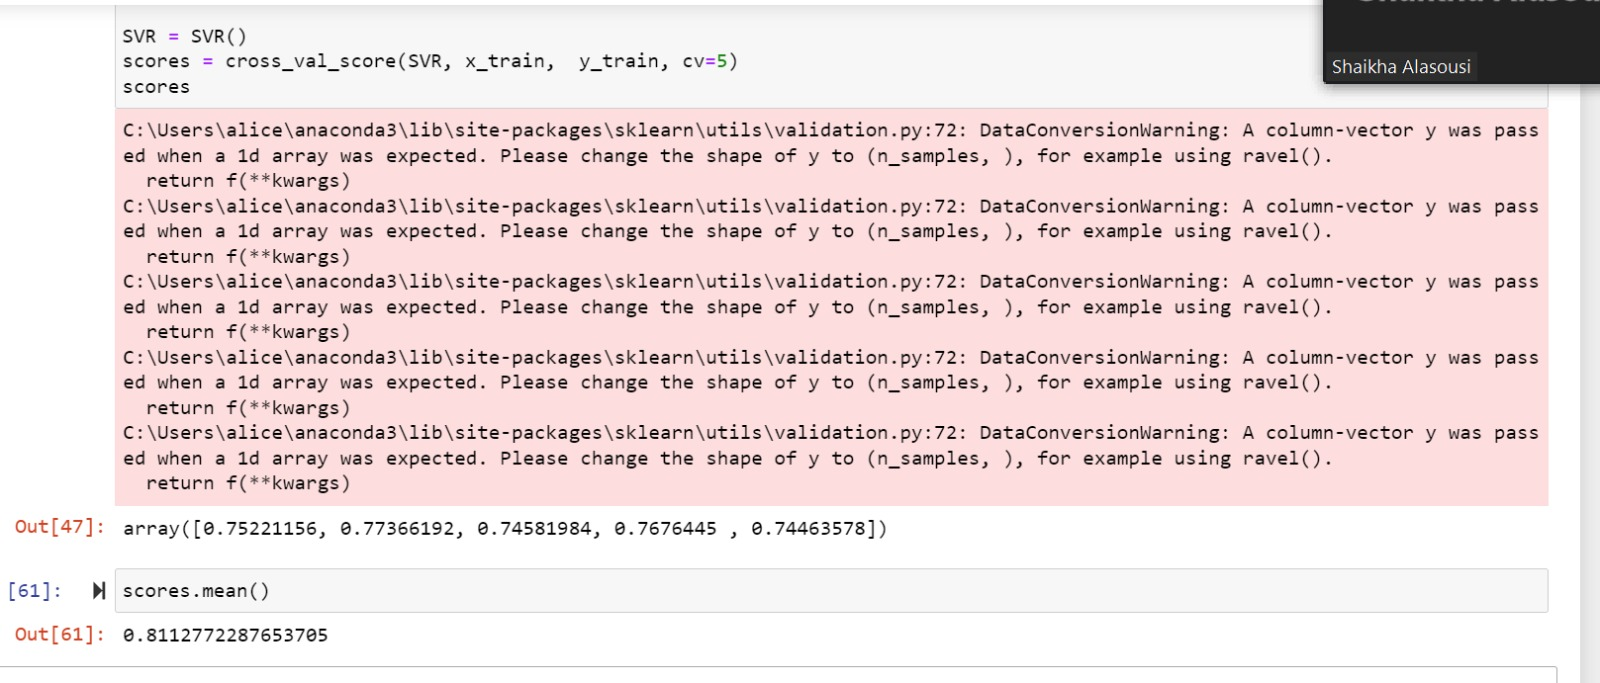

The SVM was taking a-lot of time for executing the code, And sometimes it didnot work. So here is the screenshot, if in case it also didnot work in your notebook.

## Random Forest Tree 

In [ ]:
# Performing the Random Forest Tree Regression

model_rfr = RandomForestRegressor(n_estimators=35, random_state=20)

# Using '.ravel()' to Convert the 2D Array into Contigous Flattened Array
model_rfr.fit(x_train, y_train.ravel())

In [ ]:
# Perform Prediction and Model Score

y_pred = model.predict(x_test)

print("Model Score for Training data: {}".format(model_rfr.score(x_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

In [ ]:
# Perform Cross-Validation for the 'Random Forest Tree'

RFT = RandomForestRegressor()
scores = cross_val_score(RFT, x_train, y_train, scoring='r2', cv=5)
scores.mean()

The Model Score for the Training Data is around ~0.97 which is slightly less than the Decision Tree Regressor Model. However, the most important improvement metric is the Model Score for the Testing Data which came out to be ~0.80, which is by far the highest Model Score we've found yet. It is also important to note that the Mean Squared Error for this specific Model is also low. It is lower the Decision Tree Regressor too. 

##  Adding different variables to dataframe.

In [ ]:
# Experimenting with Attribute Combinations

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

df.sample(5)

In [ ]:
# Getting the Correlation in the DataFrame
correlation = df.corr()
correlation

In [ ]:
# Let's Create a Correlation Matrix with Respect to the 'Median House Value' and Rank them from 'Highest to Lowest.'

corr_matrix = scaled_df.corr()
corr_matrix
print(corr_matrix["median_house_value"].sort_values(ascending=False))

In [ ]:
# Let's try to run a Linear Regression exclusively between 'Median Income' and Median House Value'

X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity','rooms_per_household','bedrooms_per_room','population_per_household']
X = df[X_Features]
Y = df['median_house_value']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 1)
LR.fit(x_train1,y_train1)
y1_test_pred = LR.predict(x_test1)
y1_test_pred

In [ ]:
print (x_train1.shape, y_train1.shape)
print (x_test1.shape, y_test1.shape)

In [ ]:
c = cross_val_score(LR, x_train1 ,y_train1, cv=10)
c

In [ ]:
c.mean()

Our Cross-Validation results when we've tried enhanced features comes out to ~0.64 which is a mild improvement in comparison to our other models.

In [ ]:
print((r2_score(y_test1,y1_test_pred)))

The Correlation Coefficient for this Linear Regression came out to ~0.62, which suggests that our model is accurate in predicting the Median House Value. However, it is important to note that there is still room for improvement.

# Polynomial Features:

In [ ]:
# # Polynomial Features
# degrees = [1, 2, 3, 6, 10]

# # Fit Multiple Polynomial Features
# degrees = [1, 3, 6, 9]

# # Initialize 'y_train_pred' and 'y_test_pred' Matrices to store the Train and Test Predictions
# y_train_pred = np.zeros((len(x_train),len(degrees)))
# y_test_pred = np.zeros((len(x_test),len(degrees)))

# # Make Pipeline: Create Features, then Feed Them to Line 'ar_reg' Model
# for i, degree in enumerate(degrees):
#     model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
#     model.fit(x_train, y_train)
    
#     # We're going to Predict the Test and Train Data
#     # We are Storing the Predictions of Each Degree in the Corresponding Column
#     y_train_pred[:, i] = model.predict(x_train)
#     y_test_pred[:, i] = model.predict(x_test)

# # Visualize Train and Test Predictions
# plt.figure(figzie=(16,8))

# # Train Data
# plt.subplot(121)
# plt.scatter(x_train, y_train)
# plt.yscale('log')
# plt.title("Train Data")
# for i in degree in enumerate(degrees):
#     plt.scatter(x_train, y_train_pred[:, i], s=15,label=str(degree))
#     plt.legend(loc='upper left')
    
# # Test Data
# plt.subplot(122)
# plt.scatter(x_test, y_test)
# plt.yscale('log')
# plt.title("Test Data")
# for i in degree in enumerate(degrees):
#     plt.scatter(x_test, y_test_pred[:, i], label=str(degree))
#     plt.legend(loc='upper left')
    
# # Compare r2 for Train and Test Sets (for all Polynomials Fits)
# print("R-squared values: \n")

# for i in degree in enumerate(degrees):
#         train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
#         test_r2 = round(sklearn.metrics.r2_score(y_test,y_test_pred[:,i], 2))
#         print("Polynomial Degree {0}: train score={1}, test score={2}".format(degree,train_r2,test_r2))

# # Cross-Validation
# lm = LinearRegression()
# scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
# scores

# # Create a KFold object with 5 Splits
# Folds = KFold(n_splits=5, shuffle=True, random_state=100)
# scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=Folds)
# scores

# # Let's Look at the MSE
# scores = cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
# scores

